In [2]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras

In [3]:
(X_train , y_train) ,(X_test , y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape , y_test.shape

((10000, 28, 28), (10000,))

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i in range(len(class_labels)):
  print(i, class_labels[i])

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


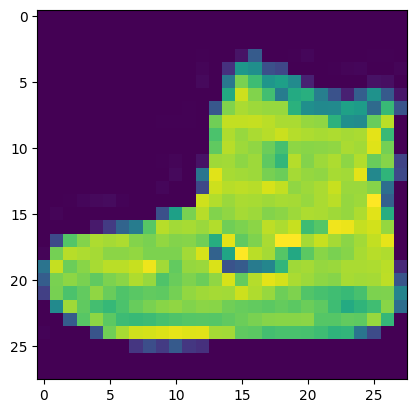

In [8]:
plt.imshow(X_train[0] )

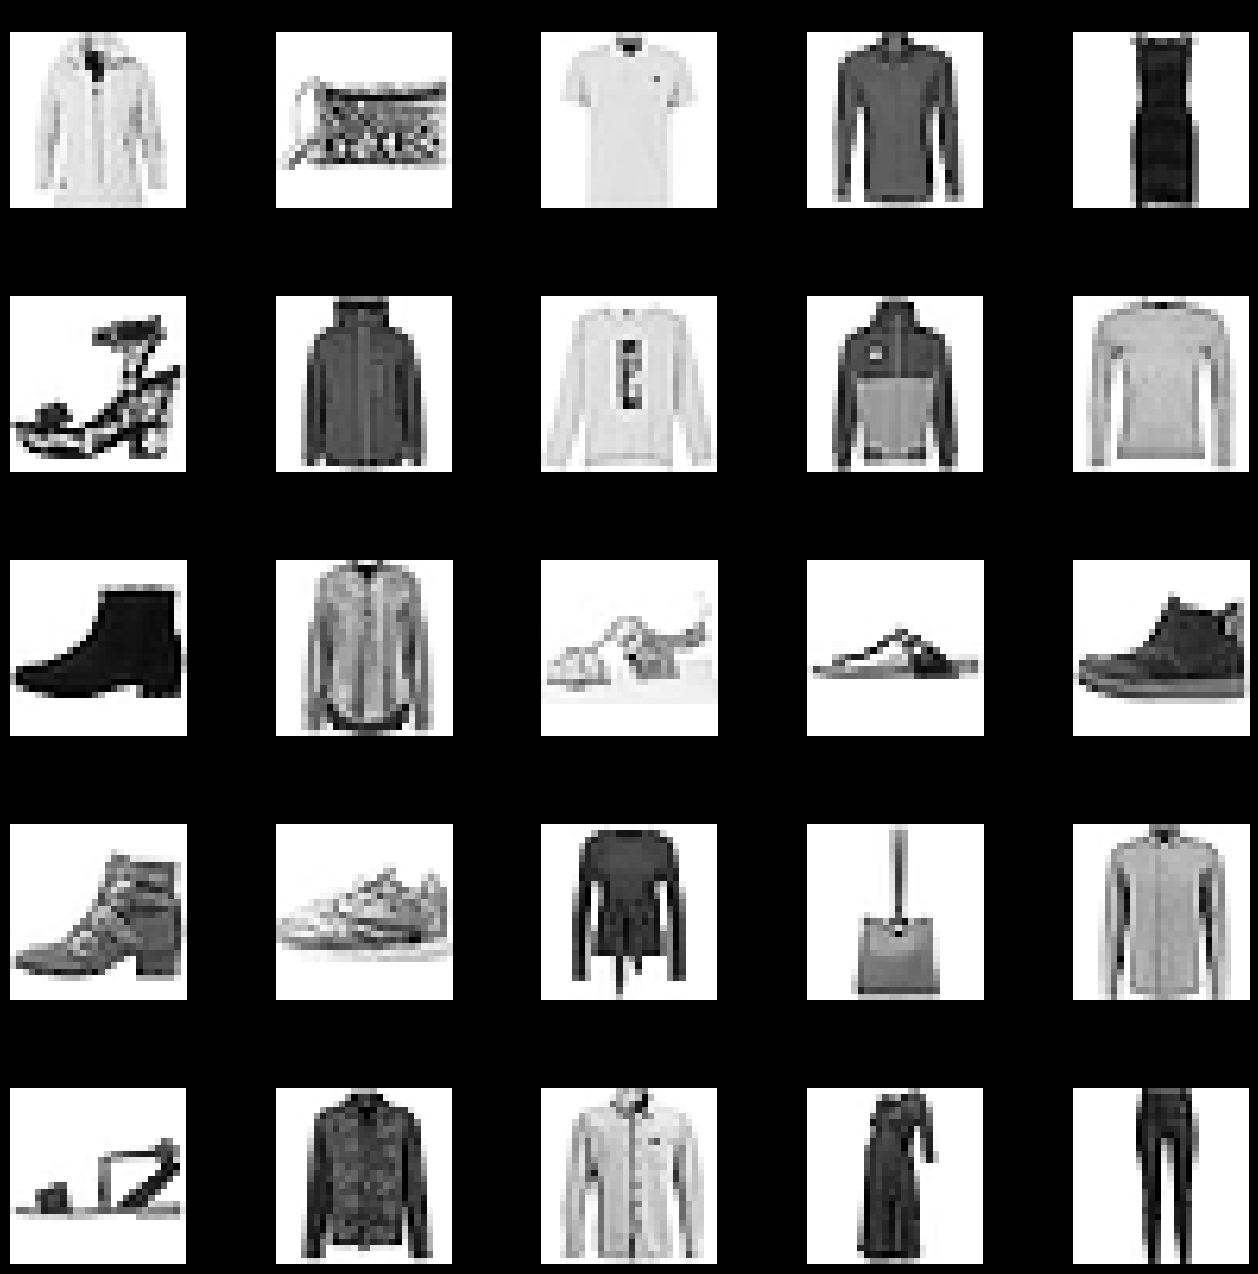

In [ ]:
plt.figure(figsize=(16,16))
fig = plt.gcf() # Get the current figure
fig.set_facecolor('black')
plt.subplots_adjust(wspace=0.5, hspace=0.5)

j = 1
for i in np.random.randint(0,1000 , 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i] , cmap = "Greys")
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))
plt.show()

Change Dimesnsion


In [10]:
X_train.ndim

3

In [11]:
X_train = np.expand_dims(X_train , -1)
X_test = np.expand_dims(X_test , -1)

In [12]:
X_train.shape

(60000, 28, 28, 1)

Feature Scaling


In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

Split Dataset


In [15]:
from sklearn.model_selection import train_test_split
X_train ,x_val , y_train , y_val = train_test_split(X_train , y_train , test_size = 0.2 , random_state =  2020)

In [16]:
x_val.shape , y_val.shape

((12000, 28, 28, 1), (12000,))

CONVOLUTIONAL NEURAL NETWORK - MODEL BUILDING


In [17]:
model = keras.models.Sequential([
                             keras.layers.Conv2D(filters = 32 , kernel_size = 3 ,strides=(1,1) ,padding = 'valid' , activation = 'relu', input_shape = [28 , 28 , 1]) ,
                             keras.layers.MaxPooling2D(pool_size = (2,2)) ,
                             keras.layers.Flatten(),
                             keras.layers.Dense(128 , activation = 'relu'),
                             keras.layers.Dense(10 , activation = 'softmax')
                         ])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [19]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

### Training Summary and Interpretation

The model was trained for 10 epochs with a batch size of 512. During each epoch, the model processes the training data in batches of 512 samples before updating its weights, which balances training speed and gradient estimation accuracy.

The training loss steadily decreased from 0.1277 in the first epoch to 0.0841 by the tenth epoch, indicating consistent improvement in the model’s ability to fit the training data. Correspondingly, the training accuracy increased from 95.43% to 97.21%, demonstrating enhanced predictive performance on the training set.

Validation metrics, evaluated on a separate validation dataset after each epoch, show that the validation loss remained relatively stable around 0.24, and validation accuracy hovered near 92%. This suggests that the model is generalizing well to unseen data without significant overfitting.

Overall, the training curves indicate successful learning with a good balance between fitting the training data and maintaining generalization performance. Further improvements could potentially be achieved by fine-tuning hyperparameters, increasing the number of epochs, or employing regularization techniques.


In [20]:
model.fit(X_train , y_train , epochs = 10 ,batch_size = 512  , verbose = 1,  validation_data = (x_val , y_val))

Epoch 1/10
94/94 [==============================] - 7s 64ms/step - loss: 0.6086 - accuracy: 0.7962 - val_loss: 0.4180 - val_accuracy: 0.8547
Epoch 2/10
94/94 [==============================] - 6s 59ms/step - loss: 0.3680 - accuracy: 0.8717 - val_loss: 0.3613 - val_accuracy: 0.8744
Epoch 3/10
94/94 [==============================] - 6s 64ms/step - loss: 0.3270 - accuracy: 0.8866 - val_loss: 0.3419 - val_accuracy: 0.8813
Epoch 4/10
94/94 [==============================] - 5s 55ms/step - loss: 0.2962 - accuracy: 0.8962 - val_loss: 0.3087 - val_accuracy: 0.8913
Epoch 5/10
94/94 [==============================] - 5s 55ms/step - loss: 0.2779 - accuracy: 0.9016 - val_loss: 0.3054 - val_accuracy: 0.8947
Epoch 6/10
94/94 [==============================] - 5s 58ms/step - loss: 0.2611 - accuracy: 0.9076 - val_loss: 0.2888 - val_accuracy: 0.8971
Epoch 7/10
94/94 [==============================] - 5s 58ms/step - loss: 0.2431 - accuracy: 0.9137 - val_loss: 0.2817 - val_accuracy: 0.9020
Epoch 8/10
94

In [24]:
model.predict(np.expand_dims(X_test[0] , axis = 0)).round(2)

1/1 [==============================] - 0s 18ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96]],
      dtype=float32)

In [27]:
np.argmax(model.predict(np.expand_dims(X_test[0] , axis = 0)))

1/1 [==============================] - 0s 25ms/step


9

In [29]:
y_test[0]

9

In [ ]:
y_pred = model.predict(X_test).round(2)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[0.  , 0.  , 0.  , ..., 0.03, 0.  , 0.96],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.12, 0.08, 0.01]], dtype=float32)

In [36]:
model.evaluate(X_test , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2745 - accuracy: 0.9014


[0.27452796697616577, 0.9014000296592712]

Visualize Output


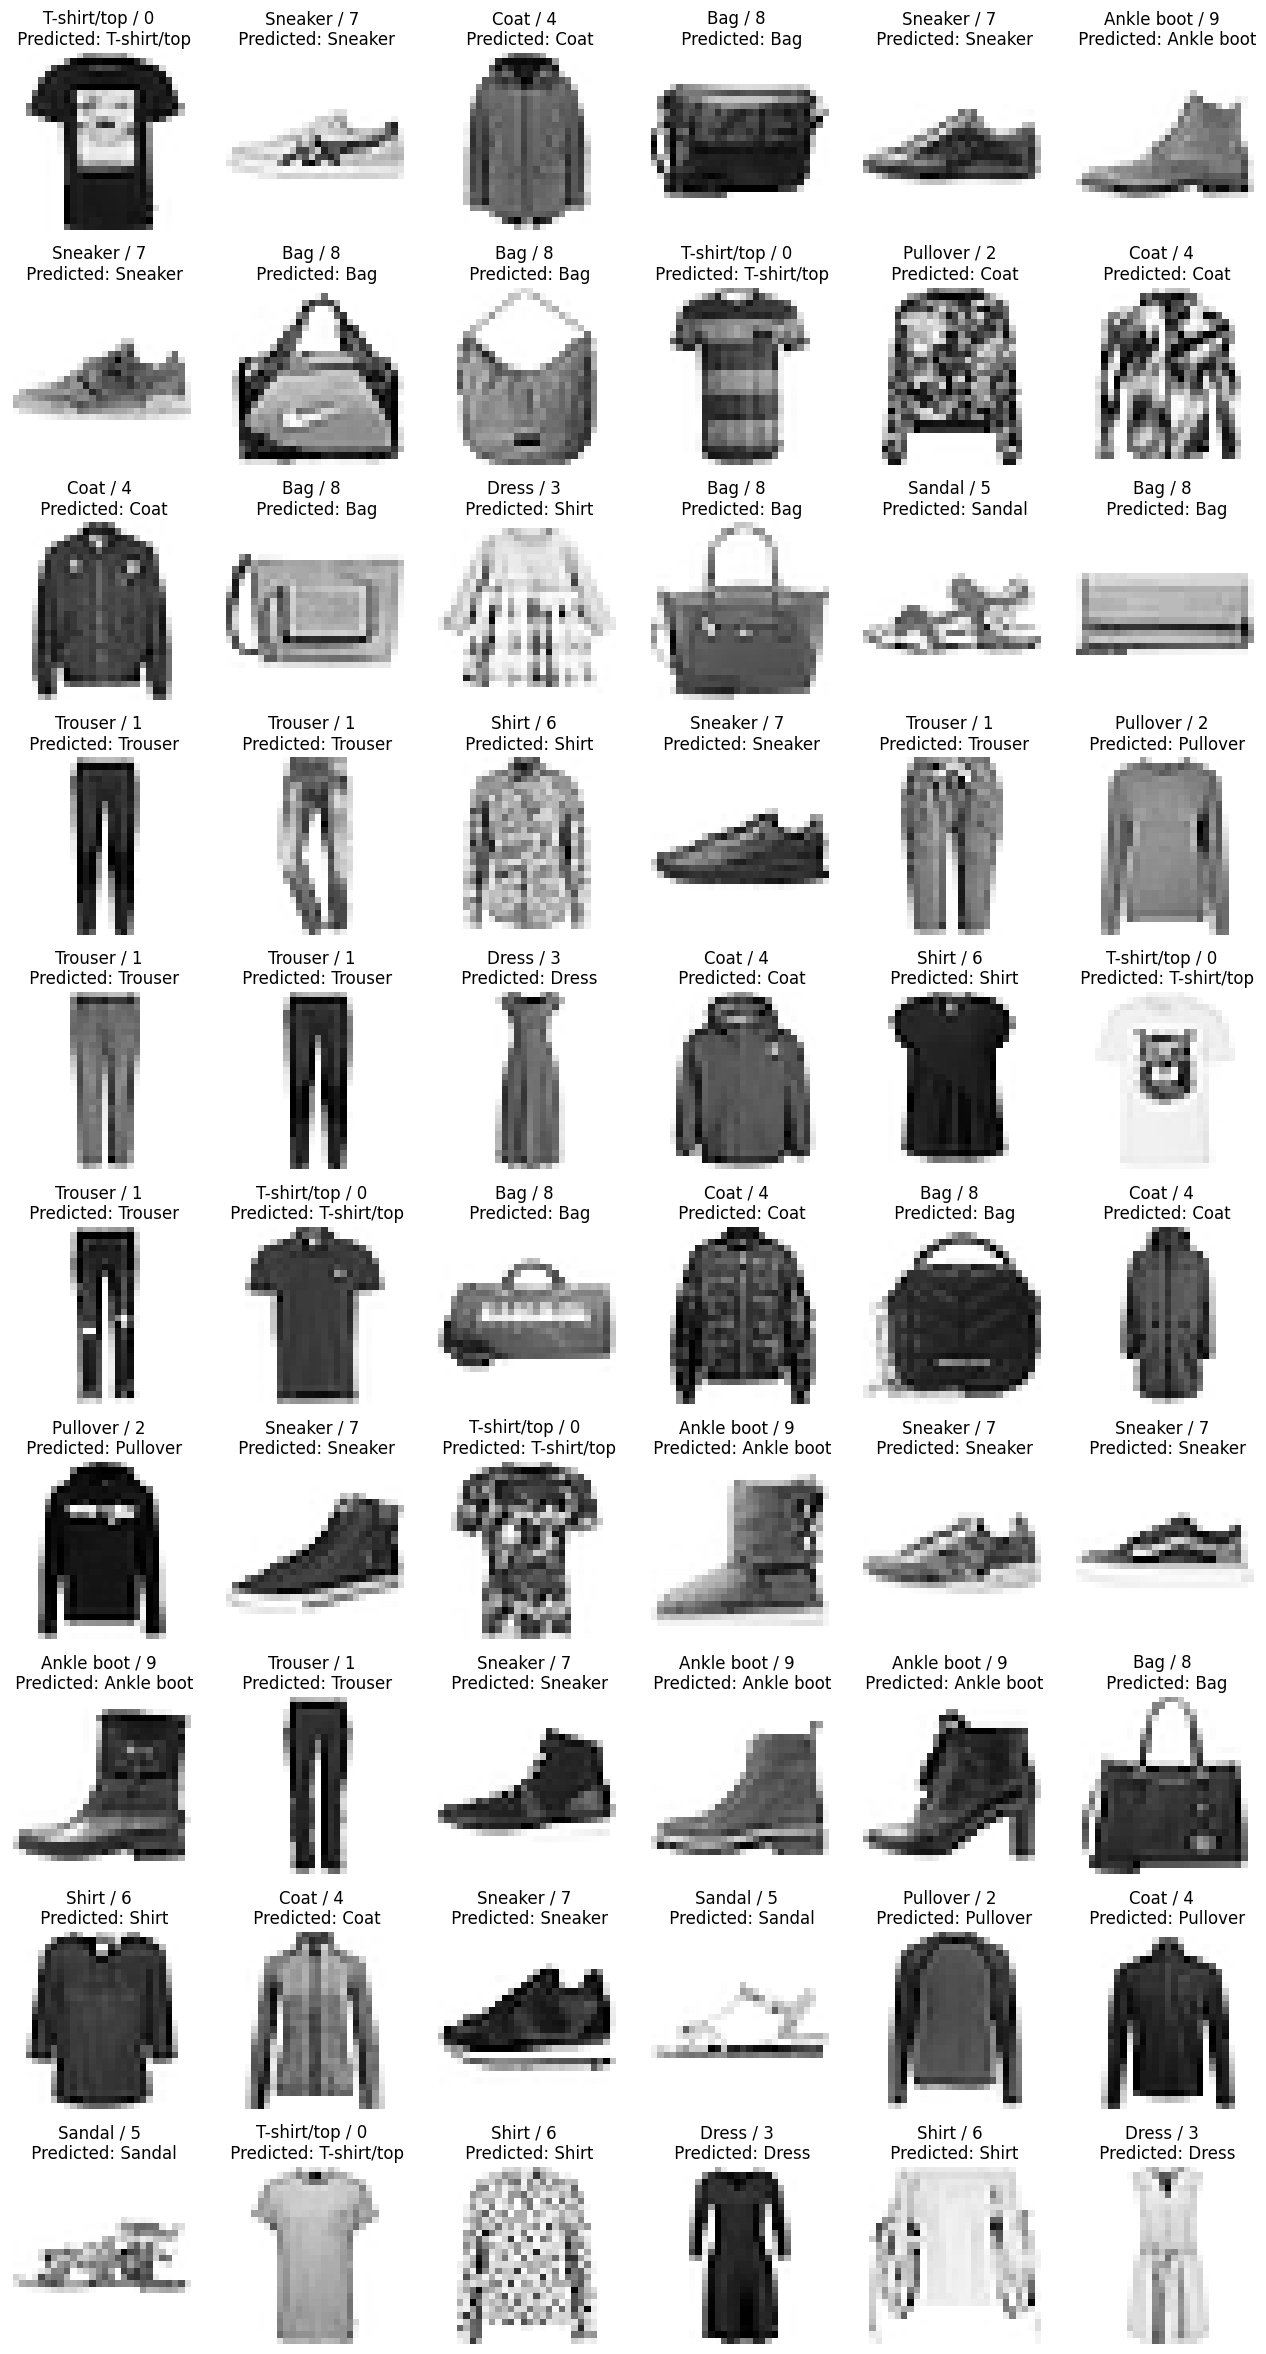

In [41]:
plt.figure(figsize=(16,30))
# fig = plt.gcf() # Get the current figure
# fig.set_facecolor('black')
# plt.subplots_adjust(wspace=0.5, hspace=0.5)

j = 1 
for i in np.random.randint(0,1000 , 60):
    plt.subplot(10, 6, j); j+=1
    plt.imshow(X_test[i].reshape(28,28) , cmap = "Greys")
    plt.title('{} / {} \n Predicted: {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])]))
    plt.axis('off')
plt.show()

Confusion Matrix

<Axes: >

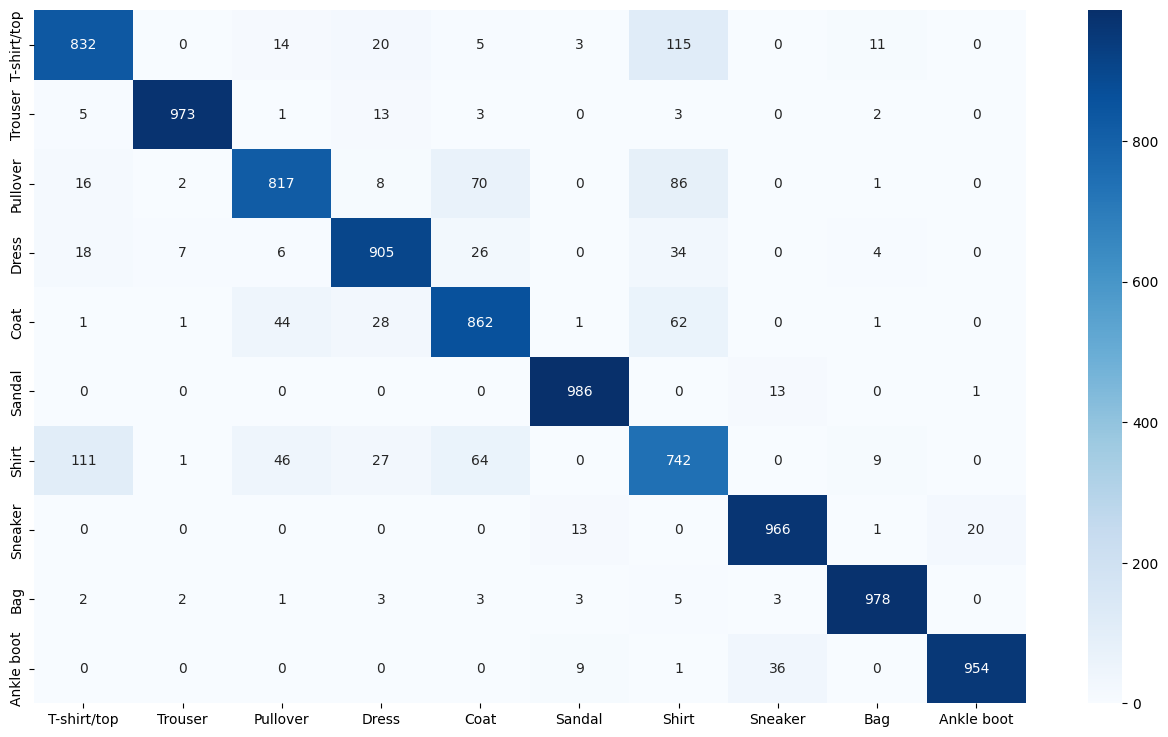

In [47]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = confusion_matrix(y_test , y_pred_labels )
# display cm 
sns.heatmap(cm , annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_labels, target_names=class_labels))


              precision    recall  f1-score   support

 T-shirt/top       0.84      0.83      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.88      0.82      0.85      1000
       Dress       0.90      0.91      0.90      1000
        Coat       0.83      0.86      0.85      1000
      Sandal       0.97      0.99      0.98      1000
       Shirt       0.71      0.74      0.72      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Save Model


In [51]:
model.save('fashion_mnist_cnn_model.h5')

In [52]:
path = 'fashion_mnist_cnn_model.h5'
model.save(path)

c:\Users\nagir\anaconda3\envs\Fashion_mnist\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [55]:
model_deploy = keras.models.load_model(path)
model_deploy.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [60]:
print(np.argmax(model_deploy.predict(np.expand_dims(X_test[0] , axis = 0)).round(2)))


1/1 [==============================] - 0s 22ms/step
9
